Project 1

Sabrina Pereira

In [76]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')

from utils import decorate
from thinkstats2 import Pmf, Cdf

import thinkstats2
import thinkplot

First, let us load the data:

In [77]:
nchs = pd.read_csv('nchs.csv', sep=',')
mcd = pd.read_csv('Multiple Cause of Death, 1999-2017.txt', sep='\t')

#Clean data to only contain rows that have valid years
mcd = mcd[mcd.Year.notna()]


In [78]:
everyone = nchs[(nchs.Race == 'All Races') & (nchs.Sex == 'Both Sexes')]
everyone.head()

,Year,Race,Sex,Average Life Expectancy (Years),Age-adjusted Death Rate
0,2015,All Races,Both Sexes,NaN,733.1
1,2014,All Races,Both Sexes,78.9,724.6
2,2013,All Races,Both Sexes,78.8,731.9
3,2012,All Races,Both Sexes,78.8,732.8
4,2011,All Races,Both Sexes,78.7,741.3


Text(0,0.5,'Average Life Expectancy (Years)')

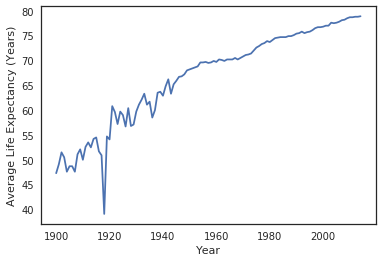

In [79]:
plt.plot(everyone.Year, everyone['Average Life Expectancy (Years)'])

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (Years)')

Here I will add the life expectancies the CDC has released in recent years that were not included in the dataset.

In [80]:
d = {'Year': [2017, 2016, 2015], 'Race': 3*['All Races'], 'Sex' : 3*['Both Sexes'], 'Average Life Expectancy (Years)':[78.6,78.7, 78.7], 'Age-adjusted Death Rate': np.nan}
df = pd.DataFrame(data=d)
a = 3*['a']

temp = everyone.drop([0])
everyone = df.append(temp, ignore_index=True)


Let's take a look at how life expectancy has changed in the recent years

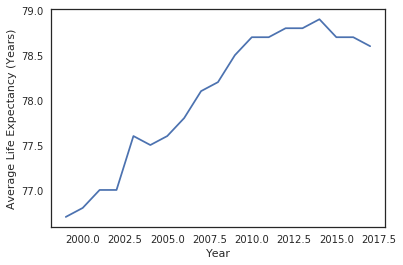

In [81]:
recent = everyone[everyone.Year > 1998]

plt.plot(recent.Year, recent['Average Life Expectancy (Years)'])

plt.xlabel('Year')
plt.ylabel('Average Life Expectancy (Years)');

Let's look at the data for opiod overdose related deaths from 1999-2016

Lets take a look at how opiod overdose related deaths have changed over the years. In order to adjust for population, we will use the crude rate instead of number of deaths - this indicates deaths per 100,000 people.

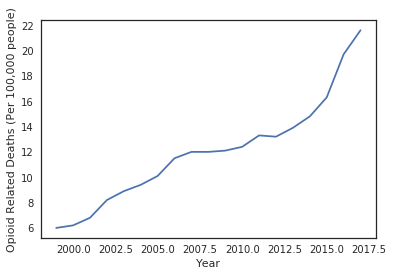

In [109]:
#Gather the total deaths in a year
totals = mcd[mcd.Notes == 'Total'].reset_index(drop=True)

plt.plot(totals.Year, totals['Crude Rate'].astype('float64'))

plt.xlabel('Year')
plt.ylabel('Opioid Related Deaths (Per 100,000 people)');

It seems that around 2015, when we start noticing that the number of opiod overdose releated deaths starts dramatically increasing, the life expectancy starts to drop.

If the increase in opiod related deaths has impacted the life expectancy negatively, we would expect to see that there is a negative relatioship between the two variables.

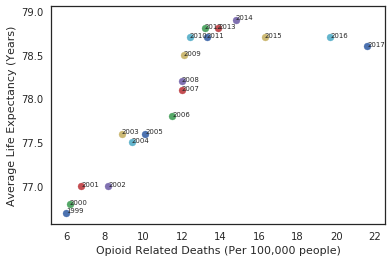

In [128]:
#Use the reverse of the life expectancy column to ensure the years are matched up correctly between the 2 datasets
recent_adjusted = recent[::-1].reset_index(drop=True)


for i, txt in enumerate(recent_adjusted.Year):
#     print(i,txt)
#     print(totals['Crude Rate'].astype('float64')[i],recent_adjusted['Average Life Expectancy (Years)'][i])
    plt.scatter(totals['Crude Rate'].astype('float64')[i],recent_adjusted['Average Life Expectancy (Years)'][i])
    plt.annotate(txt, (totals['Crude Rate'].astype('float64')[i],recent_adjusted['Average Life Expectancy (Years)'][i]), fontsize = 'xx-small')


plt.xlabel('Opioid Related Deaths (Per 100,000 people)')
plt.ylabel('Average Life Expectancy (Years)');



Unfortunately, there seems to be a very positive relationship between opioid related deaths and average life expectancy in the very beginning. The deaths related to opioid overdoses cannot be contriuting to this rising life expectancy - this is more likely due to other factors such as yearly improvements of healthcare. 

In [129]:
# grouped = mcd.groupby('Ten-Year Age Groups')
